In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pepsi-vs-coca-cola/PEP_stock_split.csv
/kaggle/input/pepsi-vs-coca-cola/KO_stock_price.csv
/kaggle/input/pepsi-vs-coca-cola/KO_stock_dividend.csv
/kaggle/input/pepsi-vs-coca-cola/KO_stock_split.csv
/kaggle/input/pepsi-vs-coca-cola/PEP_stock_price.csv
/kaggle/input/pepsi-vs-coca-cola/PEP_stock_dividend.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [3]:
Coca = pd.read_csv('/kaggle/input/pepsi-vs-coca-cola/KO_stock_price.csv',parse_dates=['Date'])
Pepsi = pd.read_csv('/kaggle/input/pepsi-vs-coca-cola/PEP_stock_price.csv',parse_dates=['Date'])

In [4]:
Coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6292 entries, 0 to 6291
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6292 non-null   datetime64[ns]
 1   Open Price   6292 non-null   float64       
 2   High Price   6292 non-null   float64       
 3   Low Price    6292 non-null   float64       
 4   Close Price  6292 non-null   float64       
 5   Volume       6292 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 295.1 KB


In [5]:
Pepsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6292 entries, 0 to 6291
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6292 non-null   datetime64[ns]
 1   Open Price   6292 non-null   float64       
 2   High Price   6292 non-null   float64       
 3   Low Price    6292 non-null   float64       
 4   Close Price  6292 non-null   float64       
 5   Volume       6292 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 295.1 KB


In [6]:
Pepsi.describe()

,Date,Open Price,High Price,Low Price,Close Price,Volume
count,6292,6292.000000,6292.000000,6292.000000,6292.000000,6.292000e+03
mean,2012-05-03 18:54:00.686586112,89.513458,90.187231,88.834462,89.540772,5.197254e+06
min,1999-11-01 00:00:00,30.130000,30.750000,29.690000,30.500000,7.721000e+05
25%,2006-02-02 18:00:00,54.957500,55.390000,54.557500,54.950000,3.628090e+06
50%,2012-05-02 12:00:00,70.800000,71.375000,70.380000,70.955000,4.634450e+06
75%,2018-08-02 06:00:00,115.455000,116.117550,114.720000,115.377500,6.021150e+06
max,2024-11-01 00:00:00,196.570000,196.880000,194.950000,196.120000,3.496370e+07
std,NaN,42.612919,42.856373,42.310455,42.586502,2.542188e+06


In [7]:
Coca.describe()

,Date,Open Price,High Price,Low Price,Close Price,Volume
count,6292,6292.000000,6292.000000,6292.000000,6292.000000,6.292000e+03
mean,2012-05-03 18:54:00.686586112,50.599119,50.997594,50.195364,50.614385,1.080178e+07
min,1999-11-01 00:00:00,35.880000,36.280000,35.580000,35.970000,1.073700e+06
25%,2006-02-02 18:00:00,43.347500,43.680000,43.020000,43.330000,6.418250e+06
50%,2012-05-02 12:00:00,48.380000,48.815000,48.000000,48.470000,9.885911e+06
75%,2018-08-02 06:00:00,57.040000,57.502500,56.560000,57.052500,1.364531e+07
max,2024-11-01 00:00:00,81.010000,81.330000,80.620000,81.120000,9.896750e+07
std,NaN,8.952755,9.021297,8.894693,8.968406,6.211032e+06


## **Missing Value Check**

In [8]:
Pepsi.isnull().sum()

Date           0
Open Price     0
High Price     0
Low Price      0
Close Price    0
Volume         0
dtype: int64

In [9]:
Coca.isnull().sum()

Date           0
Open Price     0
High Price     0
Low Price      0
Close Price    0
Volume         0
dtype: int64

## **Duplicated value check**

In [10]:
Coca.duplicated().sum()

0

In [11]:
Pepsi.duplicated().sum()

0

# **2. Data Visuzlization**

In [12]:
num_cols = Pepsi.select_dtypes(include = {'float64'}).columns

## **Pepsi Line Plot**

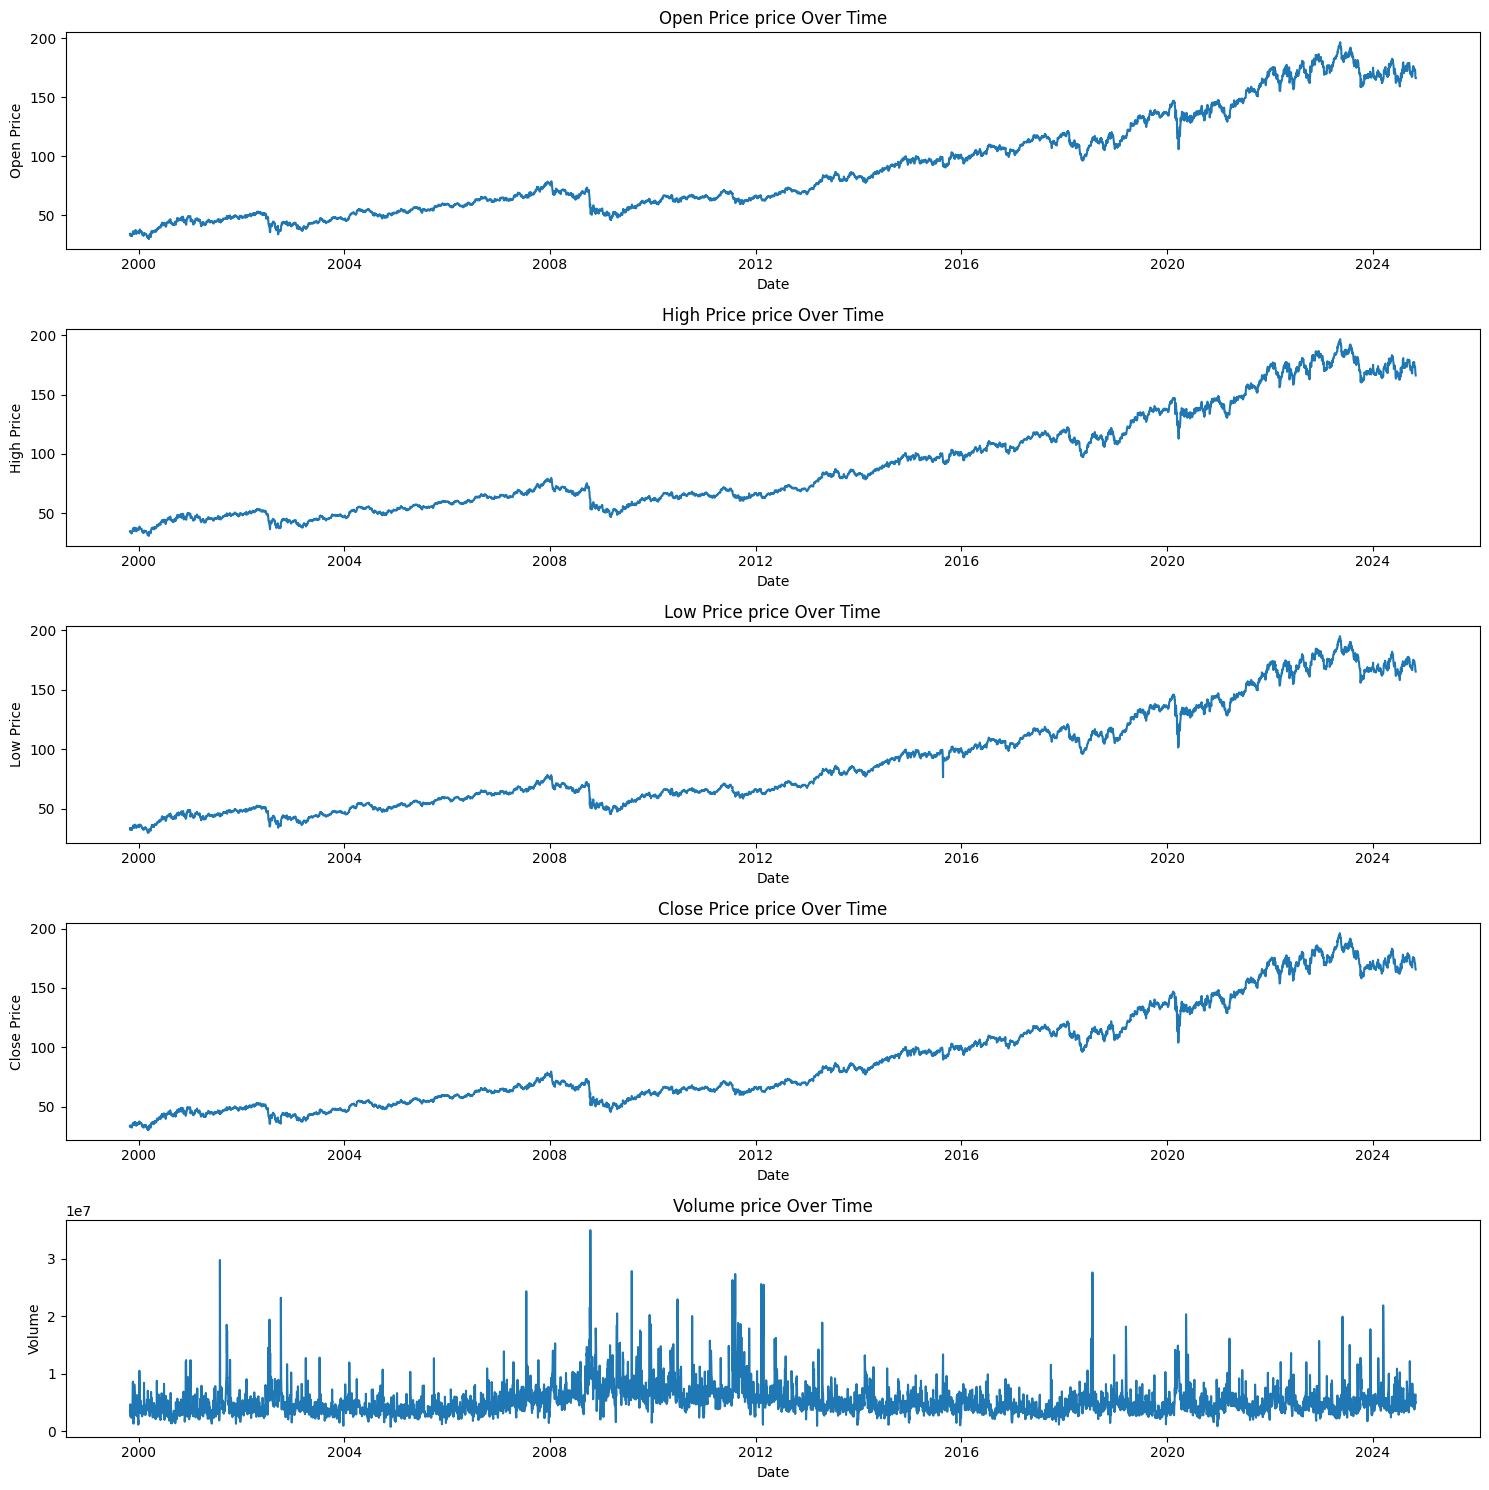

In [13]:
f, ax = plt.subplots(5,1, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.lineplot(data = Pepsi, x= Pepsi['Date'], y = cols, ax = ax[index])
    ax[index].set_title(f'{cols} price Over Time')
   
plt.tight_layout()
plt.show()  

## **Coca Line Plot**

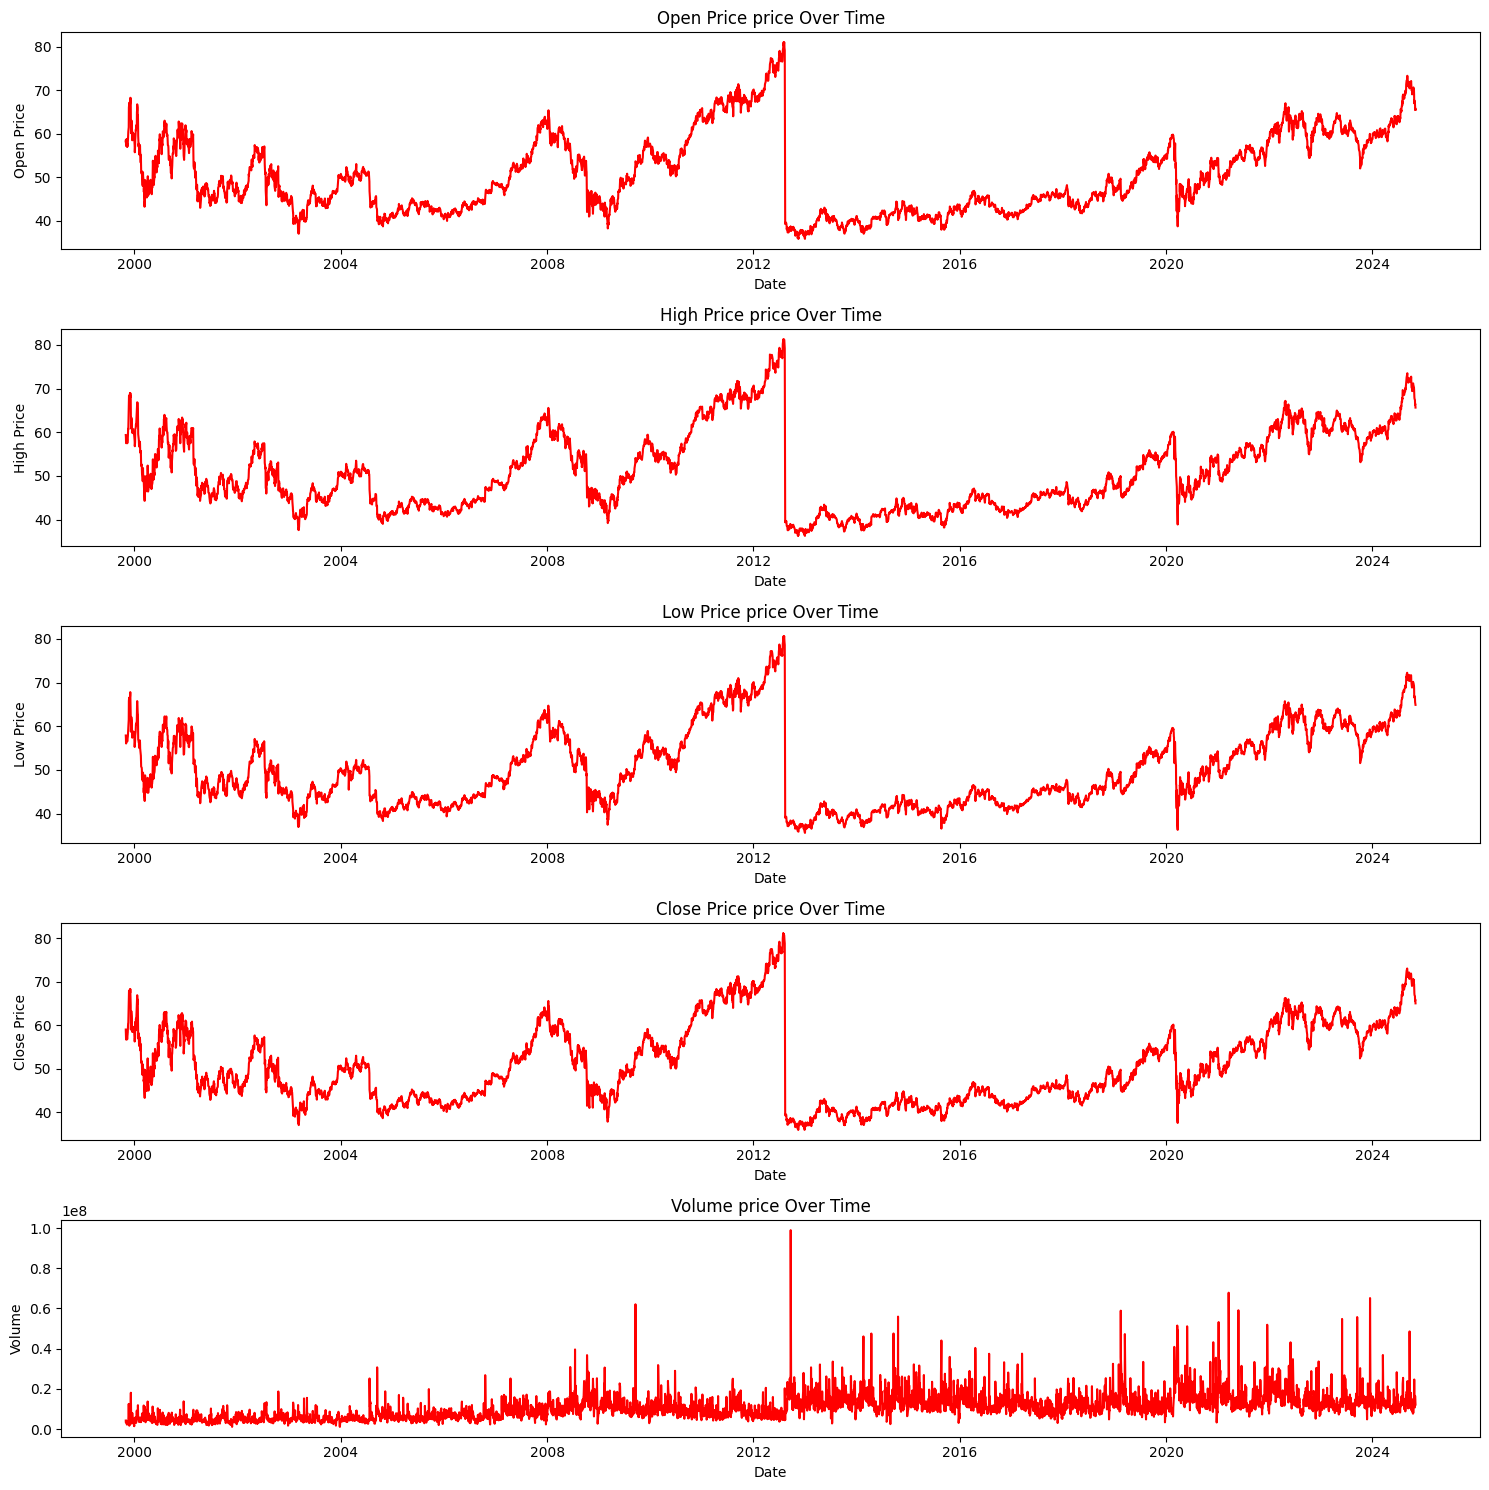

In [14]:
f, ax = plt.subplots(5,1, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.lineplot(data = Coca, x= Pepsi['Date'], y = cols, ax = ax[index], color = 'red')
    ax[index].set_title(f'{cols} price Over Time')
   
plt.tight_layout()
plt.show()  

## **Pepsi and Coca-cola Stock Price Comparison Over Time**

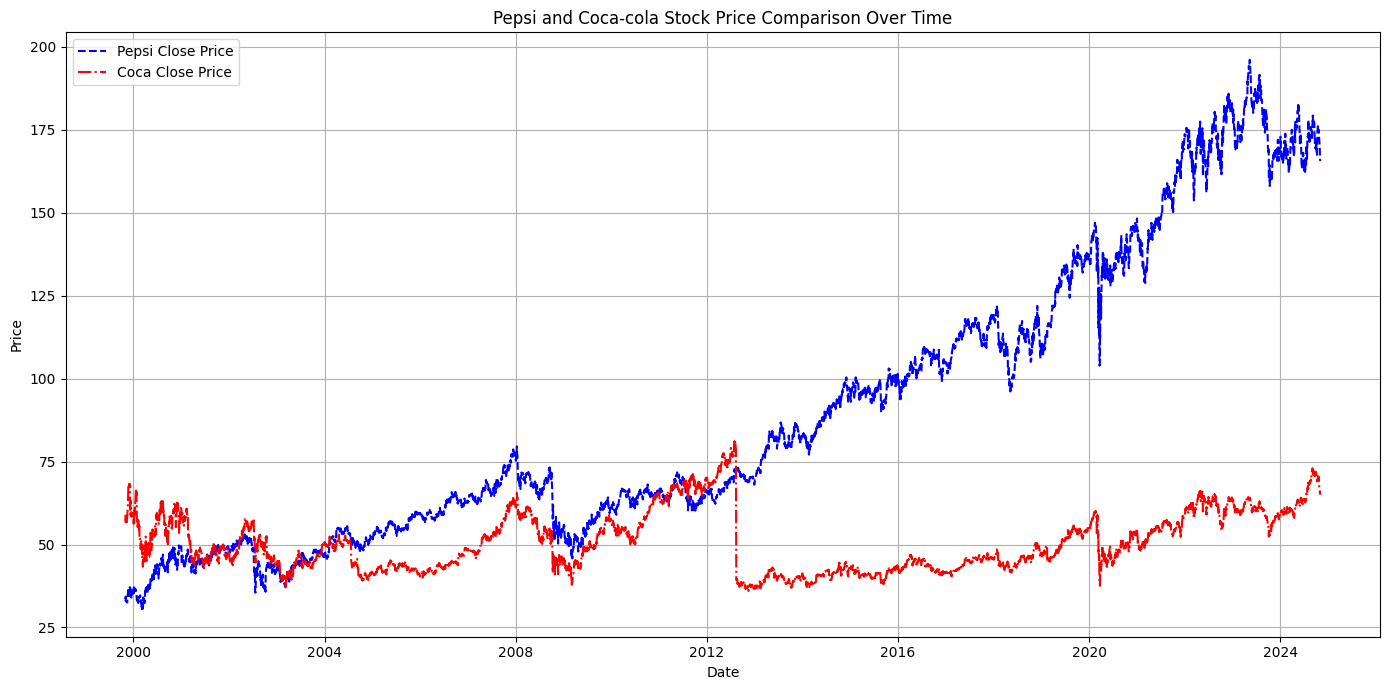

In [15]:
plt.figure(figsize=(14, 7))

plt.plot(Pepsi['Date'], Pepsi['Close Price'], label='Pepsi Close Price', color='blue', linestyle='--')
plt.plot(Coca['Date'], Coca['Close Price'], label='Coca Close Price', color='red', linestyle='-.')

plt.title('Pepsi and Coca-cola Stock Price Comparison Over Time')  
plt.xlabel('Date')  
plt.ylabel('Price')  
plt.legend()  

plt.grid(True)
plt.tight_layout()
plt.show()

**The stock price is higher Pepsi than Coca-Cola.**

## **Pepsi Moving Arrange**

In [16]:
Pepsi['MA10'] = Pepsi['Close Price'].rolling(window=10).mean()  
Pepsi['MA60'] = Pepsi['Close Price'].rolling(window=60).mean()  
Pepsi['MA120'] = Pepsi['Close Price'].rolling(window=120).mean() 

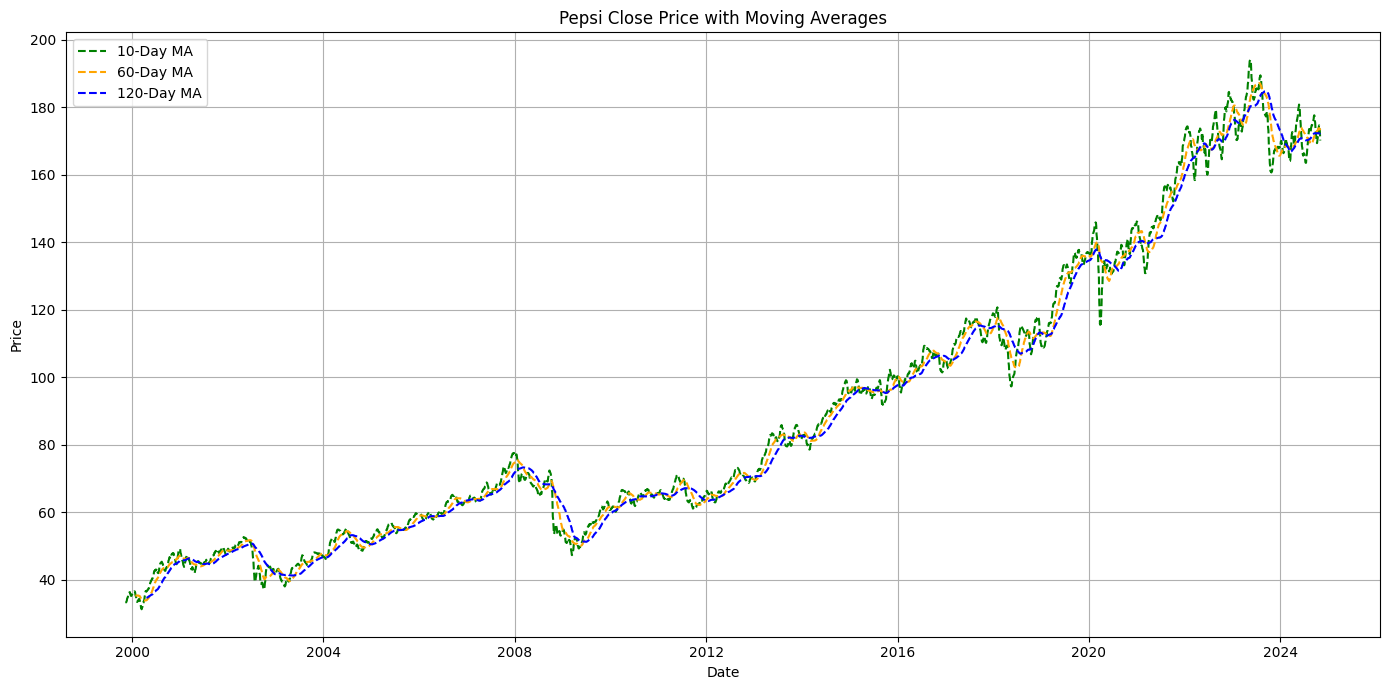

In [17]:
plt.figure(figsize=(14, 7))

plt.plot(Pepsi['Date'], Pepsi['MA10'], label='10-Day MA', color='green', linestyle='--')  
plt.plot(Pepsi['Date'], Pepsi['MA60'], label='60-Day MA', color='orange', linestyle='--')  
plt.plot(Pepsi['Date'], Pepsi['MA120'], label='120-Day MA', color='blue', linestyle='--')  

plt.title('Pepsi Close Price with Moving Averages')  
plt.xlabel('Date')  
plt.ylabel('Price')  
plt.legend()  

plt.grid(True)
plt.tight_layout()
plt.show()

## **Coca Moving Arrange**

In [18]:
Coca['MA10'] = Coca['Close Price'].rolling(window=10).mean()  
Coca['MA60'] = Coca['Close Price'].rolling(window=60).mean()  
Coca['MA120'] = Coca['Close Price'].rolling(window=120).mean() 

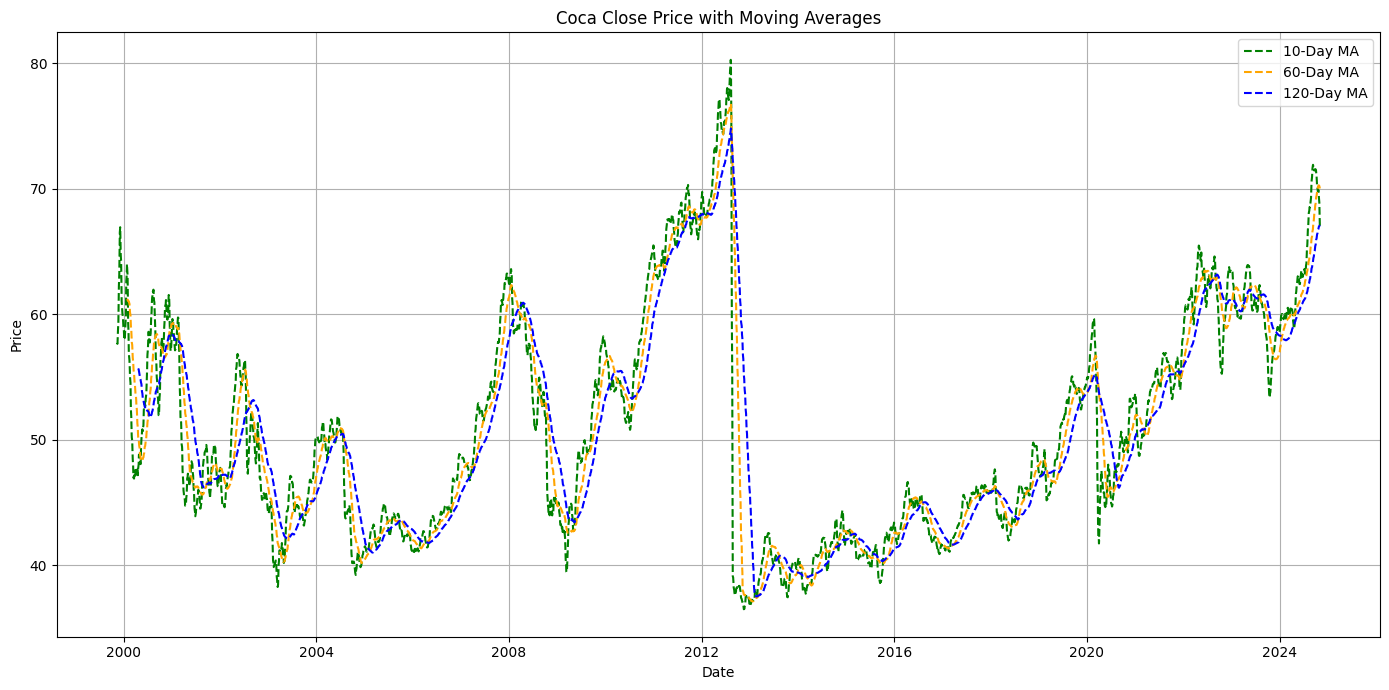

In [19]:
plt.figure(figsize=(14, 7))

plt.plot(Coca['Date'], Coca['MA10'], label='10-Day MA', color='green', linestyle='--')  
plt.plot(Coca['Date'], Coca['MA60'], label='60-Day MA', color='orange', linestyle='--')  
plt.plot(Coca['Date'], Coca['MA120'], label='120-Day MA', color='blue', linestyle='--')  

plt.title('Coca Close Price with Moving Averages')  
plt.xlabel('Date')  
plt.ylabel('Price')  
plt.legend()  

plt.grid(True)
plt.tight_layout()
plt.show()

## **Pepsi & Coca Death Cross**

**Death cross is a phenomenon which the long-term moving average exceeds the short-term moving average or support level.**

In [20]:
def Death_Cross(df):
    death_cross10_60 = (df['MA10'] < df['MA60']) & (df['MA10'].shift(1) > df['MA60'].shift(1))
    return death_cross10_60

In [21]:
Pepsi_death_cross10_60 = Death_Cross(Pepsi)
Coca_death_cross10_60= Death_Cross(Coca)

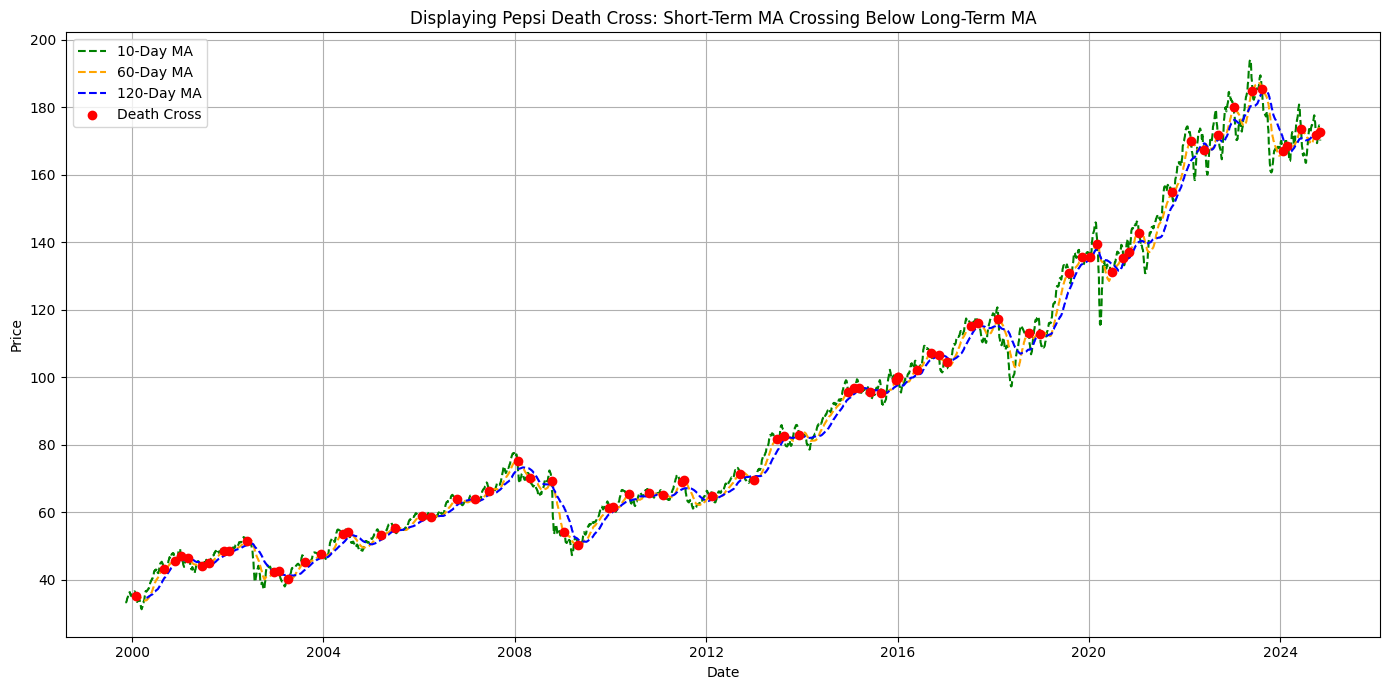

In [22]:
#Pepsi Death Cross

plt.figure(figsize=(14, 7))

plt.plot(Pepsi['Date'], Pepsi['MA10'], label='10-Day MA', color='green', linestyle='--')  
plt.plot(Pepsi['Date'], Pepsi['MA60'], label='60-Day MA', color='orange', linestyle='--')  
plt.plot(Pepsi['Date'], Pepsi['MA120'], label='120-Day MA', color='blue', linestyle='--')  

# Mark the Death Cross points
plt.scatter(Pepsi['Date'][Pepsi_death_cross10_60], Pepsi['MA10'][Pepsi_death_cross10_60], 
            color='red', label='Death Cross', zorder=3)

plt.title('Displaying Pepsi Death Cross: Short-Term MA Crossing Below Long-Term MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

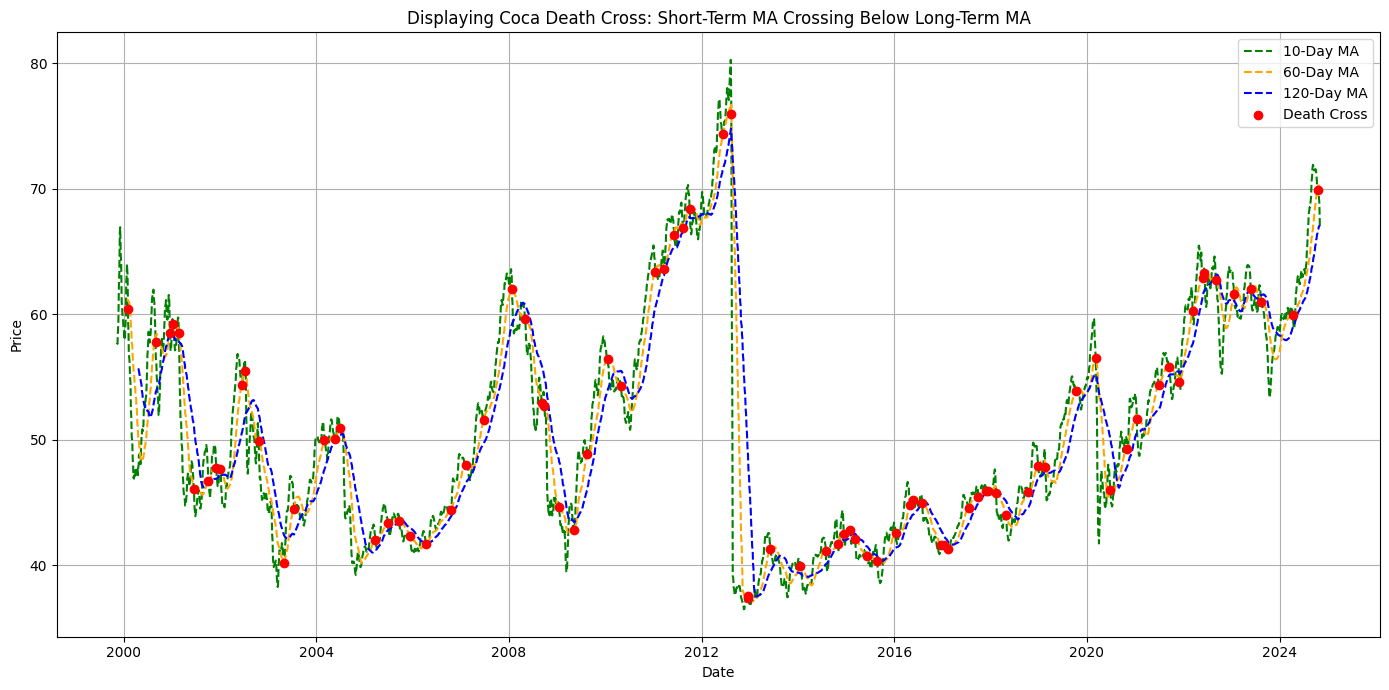

In [23]:
#Coca Death Cross

plt.figure(figsize=(14, 7))

plt.plot(Coca['Date'], Coca['MA10'], label='10-Day MA', color='green', linestyle='--')  
plt.plot(Coca['Date'], Coca['MA60'], label='60-Day MA', color='orange', linestyle='--')  
plt.plot(Coca['Date'], Coca['MA120'], label='120-Day MA', color='blue', linestyle='--')  

# Mark the Death Cross points
plt.scatter(Coca['Date'][Coca_death_cross10_60], Coca['MA10'][Coca_death_cross10_60], 
            color='red', label='Death Cross', zorder=3)

plt.title('Displaying Coca Death Cross: Short-Term MA Crossing Below Long-Term MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

## **Pepsi & Coca Golden Cross**

**Golden cross is a phenomenon which the short-term moving average exceeds the long-term moving average or support level.**

In [24]:
def Golden_Cross(df):
    golden_cross10_60 = (df['MA10'] > df['MA60']) & (df['MA10'].shift(1) < df['MA60'].shift(1))
    return golden_cross10_60

In [25]:
Pepsi_golden_cross10_60 = Golden_Cross(Pepsi)
Coca_golden_cross10_60 = Golden_Cross(Coca)

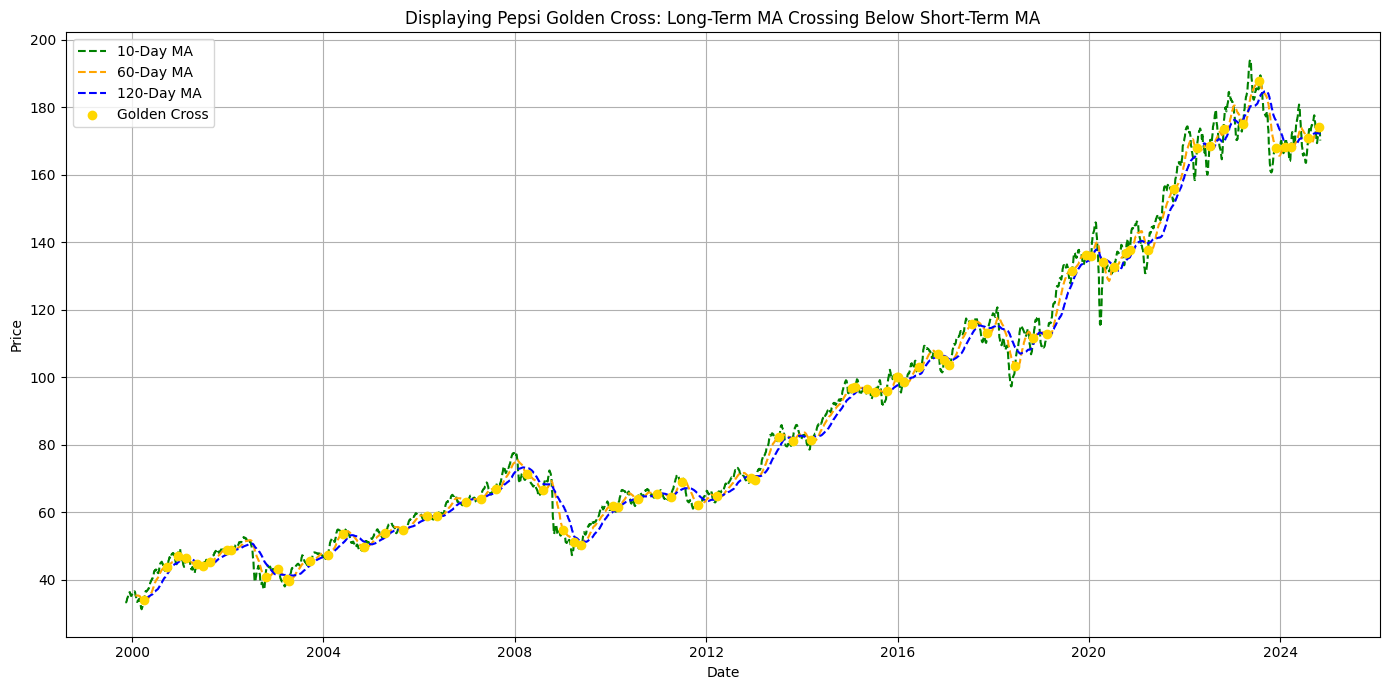

In [26]:
#Pepsi Golden Cross

plt.figure(figsize=(14, 7))

plt.plot(Pepsi['Date'], Pepsi['MA10'], label='10-Day MA', color='green', linestyle='--')  
plt.plot(Pepsi['Date'], Pepsi['MA60'], label='60-Day MA', color='orange', linestyle='--')  
plt.plot(Pepsi['Date'], Pepsi['MA120'], label='120-Day MA', color='blue', linestyle='--')  

# Mark the Death Cross points
plt.scatter(Pepsi['Date'][Pepsi_golden_cross10_60], Pepsi['MA10'][Pepsi_golden_cross10_60], 
            color='gold', label='Golden Cross', zorder=3)

plt.title('Displaying Pepsi Golden Cross: Long-Term MA Crossing Below Short-Term MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

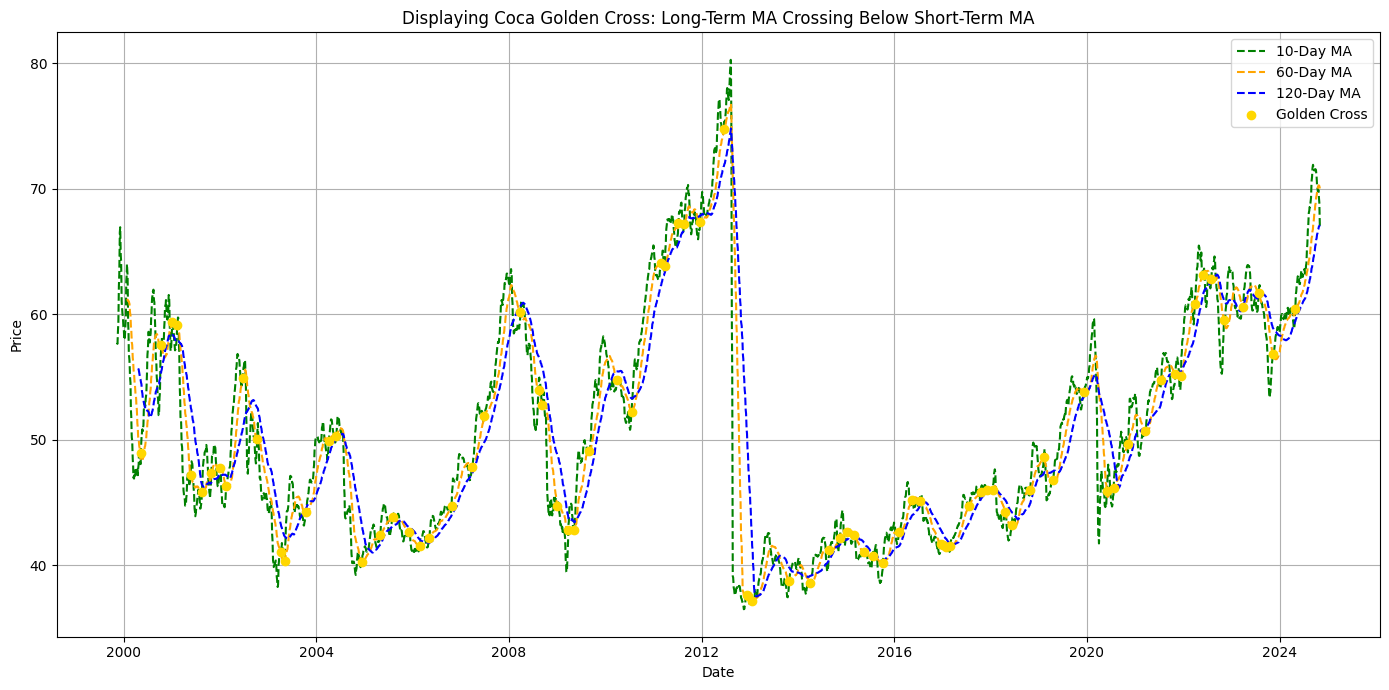

In [27]:
#Coca Death Cross

plt.figure(figsize=(14, 7))

plt.plot(Coca['Date'], Coca['MA10'], label='10-Day MA', color='green', linestyle='--')  
plt.plot(Coca['Date'], Coca['MA60'], label='60-Day MA', color='orange', linestyle='--')  
plt.plot(Coca['Date'], Coca['MA120'], label='120-Day MA', color='blue', linestyle='--')  

# Mark the Death Cross points
plt.scatter(Coca['Date'][Coca_golden_cross10_60], Coca['MA10'][Coca_golden_cross10_60], 
            color='gold', label='Golden Cross', zorder=3)

plt.title('Displaying Coca Golden Cross: Long-Term MA Crossing Below Short-Term MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

# **3. Modeling**

### **Import**

In [28]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import Image

## **Pepsi Stock Price Prediction**

### **Data Preprocessing**

In [29]:
Pepsi_data = Pepsi['Close Price'].values.reshape(-1, 1)

In [30]:
#MinMax Scale
scaler = MinMaxScaler(feature_range=(0, 1))
Pepsi_scaled_data = scaler.fit_transform(Pepsi_data)

In [31]:
# Create input sequences and labels
sequence_length = 30 
X, y = [], []

for i in range(sequence_length, len(Pepsi_scaled_data)):
    X.append(Pepsi_scaled_data[i-sequence_length:i])  
    y.append(Pepsi_scaled_data[i])  

#Conversion to Arrays
X, y = np.array(X), np.array(y)

### **Train Test Split**

In [32]:
train_size = int(len(X) * 0.8)  
X_train, X_test = X[:train_size], X[train_size:]  
y_train, y_test = y[:train_size], y[train_size:]  

In [33]:
dates = Pepsi['Date'][sequence_length:]

In [34]:
train_dates = dates[:train_size]
test_dates = dates[train_size:]

## **LSTM Model**

In [35]:
model = Sequential()

model.add(Bidirectional(LSTM(units=64, return_sequences=True, 
                              kernel_regularizer=l2(0.001), 
                              input_shape=(X.shape[1], 1))))
model.add(Dropout(0.5)) 

model.add(Bidirectional(LSTM(units=64, return_sequences=True, 
                              kernel_regularizer=l2(0.001))))
model.add(Dropout(0.5))  


model.add(LSTM(units=64, return_sequences=True, 
               kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  

model.add(LSTM(units=32, return_sequences=False, 
               kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  

model.add(Dense(units=32, activation='relu'))  
model.add(Dropout(0.5)) 

# Output layer
model.add(Dense(units=1))  

# Adjust Adam optimizer parameters
adam_optimizer = Adam(learning_rate=0.00001,  
                      beta_1=0.9,          
                      beta_2=0.999,       
                      epsilon=1e-07)       

# Compile the model using the custom Adam optimizer
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')


# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True) 

In [36]:
model.build(input_shape=(None, X.shape[1], 1))  

In [37]:
history = model.fit(X, y, epochs=10, batch_size=4, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
1409/1409 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - loss: 0.6502 - val_loss: 0.5258
Epoch 2/10
1409/1409 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - loss: 0.4872 - val_loss: 0.4181
Epoch 3/10
1409/1409 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - loss: 0.3932 - val_loss: 0.3405
Epoch 4/10
1409/1409 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - loss: 0.3152 - val_loss: 0.2678
Epoch 5/10
1409/1409 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - loss: 0.2579 - val_loss: 0.2244
Epoch 6/10
1409/1409 ━━━━━━━━━━━━━━━━━━━━ 71s 51ms/step - loss: 0.2103 - val_loss: 0.1861
Epoch 7/10
1409/1409 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - loss: 0.1767 - val_loss: 0.1616
Epoch 8/10
1409/1409 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - loss: 0.1499 - val_loss: 0.1336
Epoch 9/10
1409/1409 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - loss: 0.1296 - val_loss: 0.1119
Epoch 10/10
1409/1409 ━━━━━━━━━━━━━━━━━━━━ 72s 51ms/step - loss: 0.1159 - val_loss: 0.1060


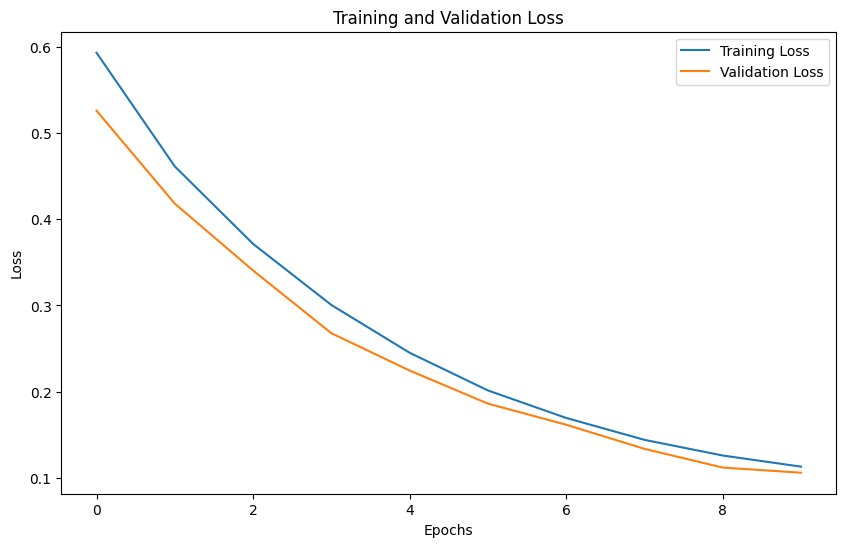

In [38]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

### **Pepsi Stock Predict**

In [39]:
y_pred = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step


In [40]:
predictions = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [41]:
y_pred = scaler.inverse_transform(y_pred)
y_actual = scaler.inverse_transform(y_test)

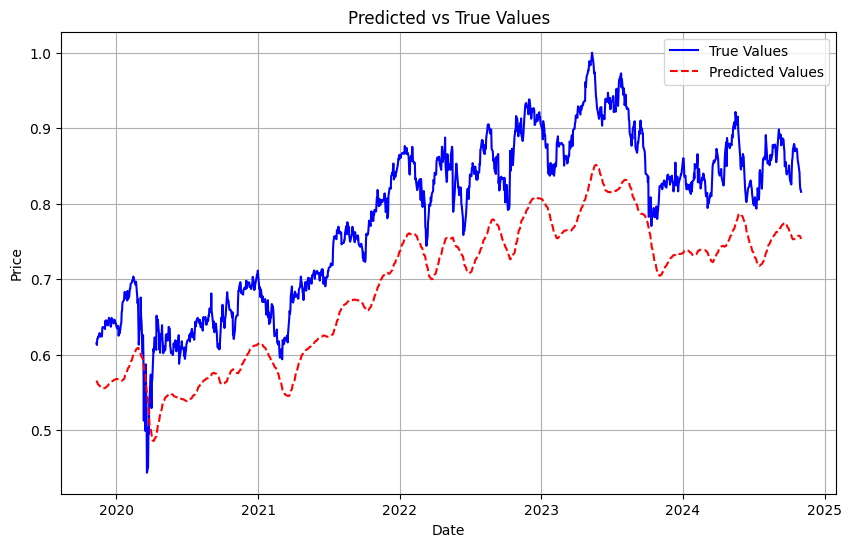

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, label='True Values', color='blue')
plt.plot(test_dates, predictions, label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.title('Predicted vs True Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## **Coca Stock Price Prediction**

In [43]:
Coca_data = Coca['Close Price'].values.reshape(-1, 1)

In [44]:
scaler = MinMaxScaler(feature_range=(0, 1))
Coca_scaled_data = scaler.fit_transform(Coca_data)

In [45]:
sequence_length = 30 
X, y = [], []

for i in range(sequence_length, len(Coca_scaled_data)):
    X.append(Coca_scaled_data[i-sequence_length:i])  
    y.append(Coca_scaled_data[i])  

#Conversion to Arrays
X, y = np.array(X), np.array(y)

In [46]:
train_size = int(len(X) * 0.8)  
X_train, X_test = X[:train_size], X[train_size:]  
y_train, y_test = y[:train_size], y[train_size:]  

In [47]:
dates = Coca['Date'][sequence_length:]

In [48]:
train_dates = dates[:train_size]
test_dates = dates[train_size:]

In [49]:
y_pred = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [50]:
predictions = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [51]:
y_pred = scaler.inverse_transform(y_pred)
y_actual = scaler.inverse_transform(y_test)

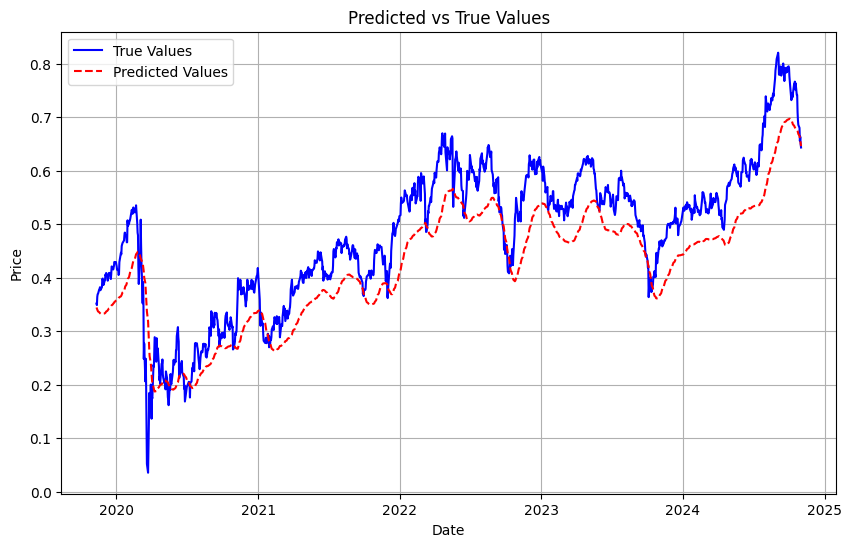

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, label='True Values', color='blue')
plt.plot(test_dates, predictions, label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.title('Predicted vs True Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**Please leave your advice in the comments. Thank you**